## Sliding Window Matching Tutorial 

The code used in this script is modified from https://github.com/bartgips/SWM

This method takes in a 1-dimensional time series of preprocessed electrophysiological data. A dataframe containing the characteristics (timing, frequency, power, etc.) of each detected burst is returned. 

Note that this tutorial relies on the following utility scripts: bg_SWM.m, bg_swm_extract.m, isfieldi.m available at https://github.com/lindseypower/BurstDetection_Tutorials

Also note that this tutorial contains MATLAB code. Therefore jupyter-matlab-proxy must be installed in order to run the script. See https://github.com/mathworks/jupyter-matlab-proxy

In [13]:
% Read in one-dimensional time series (preprocessed)
file_name = 'sub-002_SomMotA_4_R.mat';
data = load(file_name).Value;
size(data)

ans = 1x2 double
           1     1440000

In [14]:
% Resample data from 2400 to 1000 Hz
data_len = 600;
Fs = 1000;
data = resample(data, Fs, 2400);
data = data(1:Fs*data_len/2);

size(data)

ans = 1x2 double
           1      300000

### 1. Set Model Parameters 

Sliding Window Matching critically requires the window length to be specified. This parameter greatly affects the found shape (i.e., longer windows find lower frequency patterns) thus it is important to set the window length to the predicted burst duration. The method also identifies a fixed number of windows across the trial. Here, we have set the number of windows per trial to the approximate burst rate expected for this data. 

A complete list of the modifiable parameters can be found at https://github.com/bartgips/SWM

In [15]:
% Apply a bandpass filter to the data to target the beta frequency activity 
data = bandpass(data,[15,30],Fs);

In [16]:
% Create parameter structure required by SWM function 
cfg_init.winLen = 200; 
cfg_init.winPerTrial = 2*(length(data)/Fs);
cfg_init.numClust = 1;
cfg_init.verbose = 0;
cfg_init.dispPlot = 1;

### 2. Run Sliding Window Matching 

Calls bg_SWM function to identify a recurring pattern of a specified length throughout the signal. The function returns an object containing information about the found pattern including its optimal shape and the optimal time points throughout the signal where the shape is found. 

Note that compared to other burst detection methods, this method has a rigid overall burst rate and burst duration but has a flexible waveform shape, adaptable to the signal of interest.

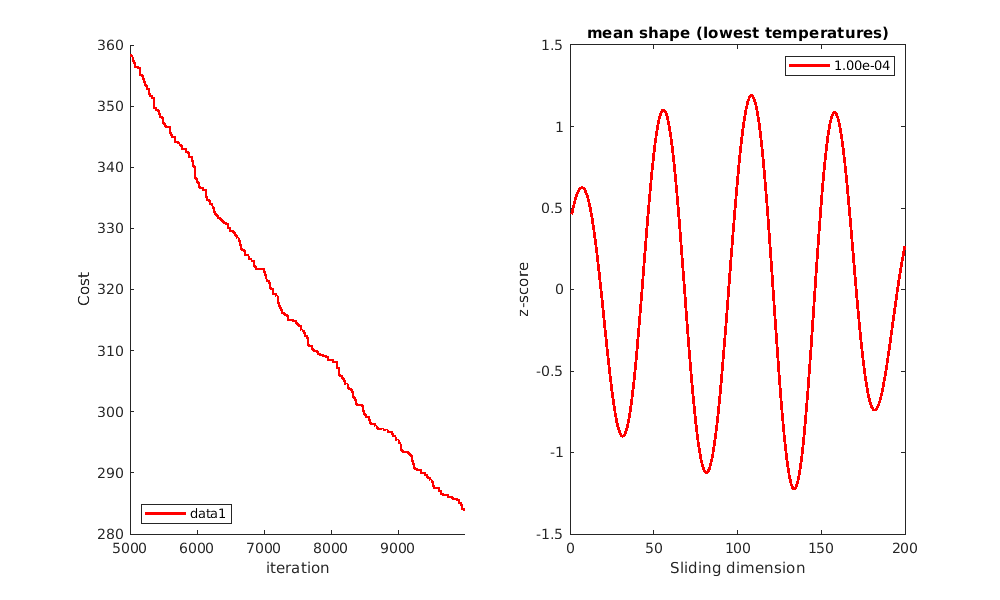

In [17]:
% Call SWM function 
[cfg] = bg_SWM(cfg_init, data);

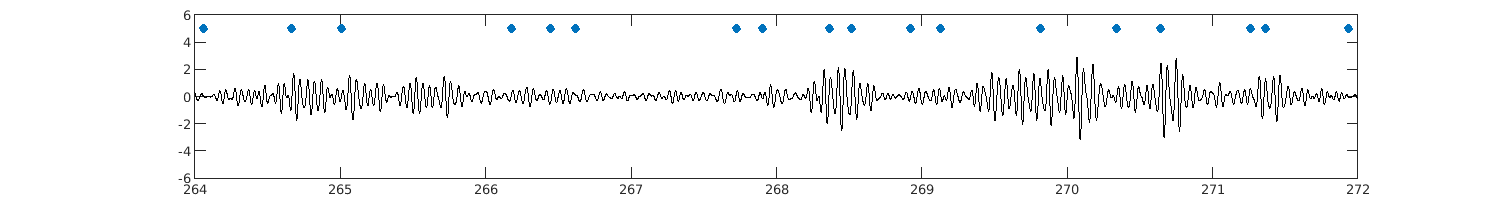

In [18]:
% Create a plot to show the timepoints at which the recurring pattern was identified 
clf('reset');
f = figure;
f.Position = [0,0,1500,200];
times = linspace(0,length(data),length(data))/Fs;
plot(times,data,'k');
hold on; 
scatter(cfg.best_loc/Fs, repelem([5],length(cfg.best_loc)),"MarkerFaceColor","#0072BD","MarkerEdgeColor","#0072BD");
xlim([264,272]);
ylim([-6,6])

In [19]:
% save cfg variable
save("swm_cfg.mat", "cfg")